# Libraries


In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Read Data

In [3]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    print(df.head())
    return df


# Data Classification

In [4]:
def classify_columns(data_frame):
    categorical_columns = data_frame.select_dtypes(include=['object']).columns
    numeric_columns = data_frame.select_dtypes(include=['int64', 'float64']).columns
    
    return list(categorical_columns), list(numeric_columns)

# Basic Preprocessing 

In [5]:
def preprocess_categorical_data(data_frame, column_name):
    # Impute missing values
    if column_name == 'Sex':
        mapping = {'male': 0, 'female': 1}  # Define mapping for Sex column
    elif column_name == 'Embarked':
        mapping = {'S': 0, 'C': 1, 'Q': 2}  # Define mapping for Embarked column
    else:
        imputer = SimpleImputer(strategy='most_frequent')
        transformed_values = imputer.fit_transform(data_frame[[column_name]])
        data_frame.iloc[:, data_frame.columns.get_loc(column_name)] = transformed_values.ravel()  # Assign transformed values using iloc
    # Map categorical values to numerical values


    data_frame[column_name] = data_frame[column_name].map(mapping)

    return data_frame


def preprocess_numeric_data(data_frame, column_name):
    # Impute missing values
    imputer = SimpleImputer(strategy='median')
    data_frame[column_name] = imputer.fit_transform(data_frame[[column_name]])

    # Scale numeric values
    scaler = StandardScaler()
    data_frame[column_name] = scaler.fit_transform(data_frame[[column_name]])

    return data_frame

# Remove Outliers

In [6]:
def remove_numeric_outliers(df, multiplier=1):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        if column != 'Survived': 
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - multiplier * iqr
            upper_bound = q3 + multiplier * iqr
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Feature Selection 

In [7]:
def feature_selection(dataset, target_variable, k=5):
    if target_variable not in dataset.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in the dataset columns.")
    
    # Specify the desired column names
    selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    
    # Check if the target variable is not already included in the selected columns
    if target_variable not in selected_columns:
        selected_columns = [target_variable] + selected_columns

    try:
        # Select only the specified columns
        selected_dataset = dataset[selected_columns]
    except KeyError as e:
        # If any of the specified columns are not found in the dataset, raise an error
        raise KeyError(f"One or more specified columns not found in the dataset: {e}")

    return selected_dataset, dataset[target_variable]


# Model Selection 

In [8]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, target_variable):
    if target_variable == 'Survived':
        y_train = y_train.astype(int)
        y_test = y_test.astype(int)
        logistic_regression_model = LogisticRegression(random_state=42)
        random_forest_model = RandomForestClassifier(random_state=42)
        xgboost_model = XGBClassifier(random_state=42)
        logistic_regression_model.fit(X_train, y_train)
        random_forest_model.fit(X_train, y_train)
        xgboost_model.fit(X_train, y_train)
        logistic_regression_predictions = logistic_regression_model.predict(X_test)
        random_forest_predictions = random_forest_model.predict(X_test)
        xgboost_predictions = xgboost_model.predict(X_test)
        logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
        random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
        xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)

        print("Logistic Regression Accuracy:", logistic_regression_accuracy)
        print("Random Forest Accuracy:", random_forest_accuracy)
        print("XGBoost Accuracy:", xgboost_accuracy)

        # Output the best model
        best_model = max([
            ('Logistic Regression', logistic_regression_accuracy*100),
            ('Random Forest', random_forest_accuracy*100),
            ('XGBoost', xgboost_accuracy*100)
        ], key=lambda x: x[1])

        print(f"\nBest Model: {best_model[0]} with Accuracy: {best_model[1]}")

        return best_model[0], best_model[1]

    else:
        raise ValueError("Invalid target variable name")



# Best Model 

In [9]:
def train_best_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    print(f"Model: {type(model).__name__} - Accuracy: {accuracy}")

    return accuracy

# Plots

In [10]:
def plot_box_plots(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot For Checking   Outliers")
    plt.xticks(rotation=45)
    plt.show()

def plot_histograms(X):
    X.hist()
    plt.suptitle('Histograms of Features')
    plt.show()

# Main 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

 

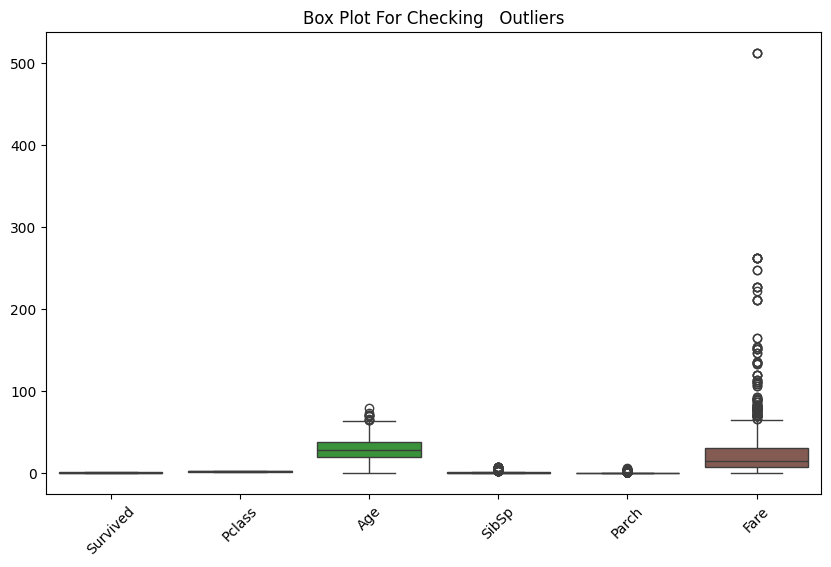


 preprocessed data 
 
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
<class 'numpy.ndarray'>
   Survived    Pclass  Sex       Age     SibSp     Parch      Fare  Embarked
0         0  0.827377    0 -0.565736  0.432793 -0.473674 -0.502445       0.0
1         1 -1.566107    1  0.663861  0.432793 -0.473674  0.786845       1.0
2         1  0.827377    1 -0.258337 -0.474545 -0.473674 -0.488854       0.0
3         1 -1.566107    1  0.433312  0.432793 -0.473674  0.420730       0.0
4         0  0.827377    0  0.433312 -0.474545 -0.473674 -0.486337       0.0


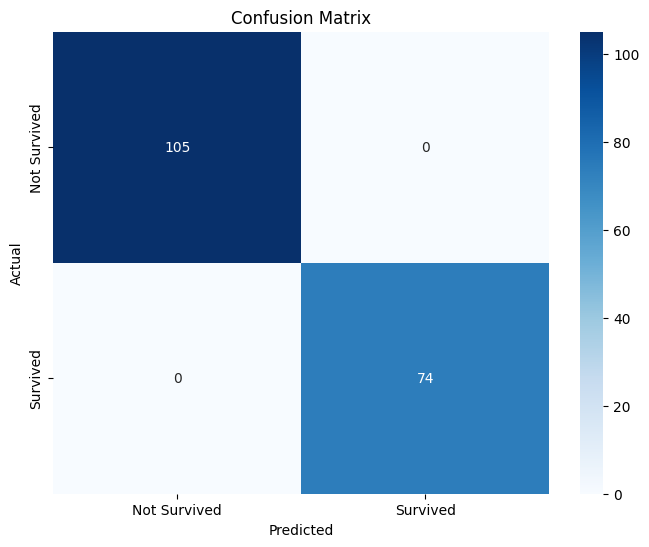

Confusion Matrix:
[[105   0]
 [  0  74]]

Classification Report:
              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00       105
    Survived       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179


Overall Accuracy for Best Model: 100.0


In [11]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
def main():
    file_path = 'Titanic-Dataset.csv'
    dataset = read_csv(file_path)
    print("\n Data Set ")
    dataset, target_variable = feature_selection(dataset, 'Survived', k=5)
    categorical_columns, numeric_columns = classify_columns(dataset)
    print("\nCategorical Columns:", categorical_columns)
    print("\nNumeric Columns:", numeric_columns)
    print("\n plot to check the outliers\n ")
    plot_box_plots(dataset)
    for column in categorical_columns + numeric_columns:
        if column in categorical_columns and column != 'Survived': 
            dataset = preprocess_categorical_data(dataset, column)
        elif column != 'Survived':  
            dataset = preprocess_numeric_data(dataset, column)
    print("\n preprocessed data \n ")
    print(dataset.columns)
    survived_column = dataset['Survived']
    label_encoder = LabelEncoder()
    target_variable = label_encoder.fit_transform(survived_column)
    print(type(target_variable))
    print(dataset.head())
    X_train, X_test, y_train, y_test = train_test_split(dataset, target_variable.astype(int), test_size=0.2, random_state=42)
    X_train_no_outliers = remove_numeric_outliers(X_train)
    best_model = RandomForestClassifier(random_state=42)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nOverall Accuracy for Best Model: {accuracy*100}")
   

    return best_model
    


if __name__ == "__main__":
    best_model = main()

